## Discrete_model, overshoot, and logistic map



In [26]:
import numpy as np
import matplotlib
#This code runs growth models logistic growth model
modeltype = 2;


#Input parameters
N0 = 1; #Initial population size
r = 2; #Population growth rate
K = 100; #Carrying capacity [only pertains to logistic]
t = 200; #Number of generations

# Make the "storage variables"
generation = np.linspace(0, t, t + 1)
dNdt = np.zeros_like(generation)
population = np.zeros_like(generation)

In [27]:
# "If" statement selects appropriate model
if modeltype == 1:   # run the exponential growth model
    for i in range(1, len(generation)):
        if i == 1:   # The generation has population = N0
            population[i] = N0
            dNdt[i] = r * population[i]
        else:
            population[i] = population[i - 1] + dNdt[i - 1]
            dNdt[i] = r * population[i]

elif modeltype == 2:   # run the logistic growth model
    for i in range(1, len(generation)):
        if i == 1:
            population[i] = N0
            dNdt[i] = r * population[i] * (1 - population[i] / K)
        else:
            population[i] = population[i - 1] + dNdt[i - 1]
            dNdt[i] = r * population[i] * (1 - population[i] / K)

else:
    print('Error: Choose 1 for exponential model or 2 for logistic model')

/Users/haoran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


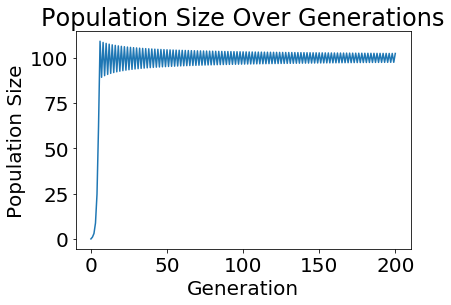

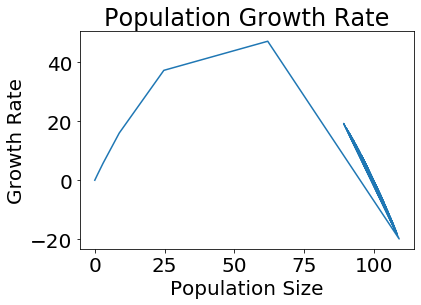

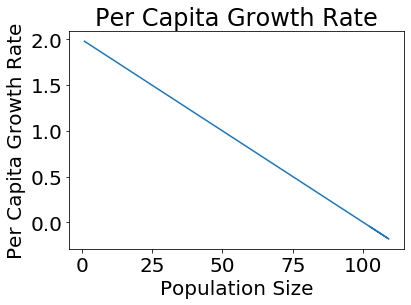

In [28]:
# Make a plot to look at your results

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(generation, population)
plt.xlabel('Generation')
plt.ylabel('Population Size')
plt.title('Population Size Over Generations')


# Note that with the logistic model you mihgt get multiple growth
# rate values for the same population size (which makes sense because
# the population's growth rate depends both on its current size and previous size). 
# This results in some pretty spirals...


plt.figure(2)
plt.plot(population, dNdt)
plt.xlabel('Population Size')
plt.ylabel('Growth Rate')
plt.title('Population Growth Rate')


plt.figure(3)
plt.plot(population, dNdt / population)
plt.xlabel('Population Size')
plt.ylabel('Per Capita Growth Rate')
plt.title('Per Capita Growth Rate')

plt.show()


In some cases, the population size of converges to an attractive fixed point (the carrying capacity) or diverges to inifinity. In some cases it appears to do neither but oscillation. Let's take a look in a simplified way. Here we use the logistic map model 


Logistic map equation:


$ X_{n+1} = r X_n (1-X_n) $

Run all the code below. Experiment with the plot_cobweb function by increasing the parameter  𝑟  and/or changing the initial value,  𝑥  as inputs in the last cell. Rerun the last cell to study the behavior of different families of the  𝑟  parameter.




In [29]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt


def plot_cobweb(f, r, x0, nmax=50):
    """A cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    dpi = 100
    x = np.linspace(0, 1, 500)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], r)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x)$')
    ax.set_title('$x_0 = {:.1}, r = {:.3}$'.format(x0, r))



In [30]:
#The logistic map iterative function 
def f(x, r):
    return r*x*(1-x)

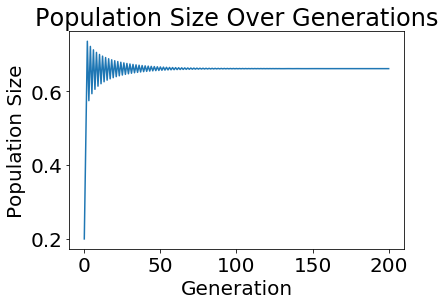

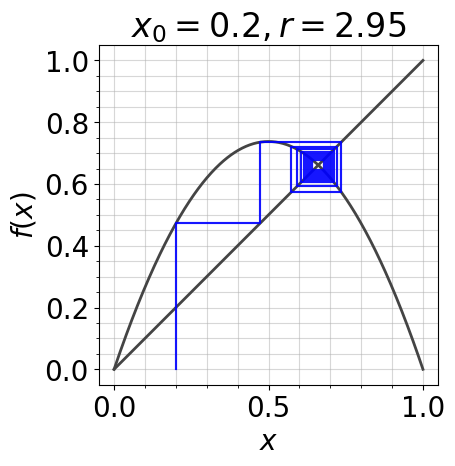

In [33]:
N0 = 0.20; #Initial value
r = 2.95; #Population growth rate
t = 200; #Number of generations

# Make the "storage variables"
generation = np.linspace(0, t, t + 1)
population = np.zeros_like(generation)
population[0] = N0


for i in range(1, len(generation)):
    population[i] = f(population[i-1],r)

matplotlib.rc('font', size=20)
plt.plot(generation, population) #plot population size over time
plt.xlabel('Generation')
plt.ylabel('Population Size')
plt.title('Population Size Over Generations')

plt.show()
plot_cobweb(f, r, N0) #plot cobweb 
